# DenseNet121

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
from keras.applications import DenseNet121
d121_conv = DenseNet121(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 1024))

In [ ]:
d121_conv.summary()

In [ ]:
d121_conv.input

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
train_features = np.zeros(shape=(nTrain, 7, 7, 1024))
train_labels = np.zeros(shape=(nTrain,3))

In [12]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen2 = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    validation_split = 0.2)
model_path = "E://CN240//model//model5-{epoch:02d}-{val_accuracy:.4f}.h5"


train_gen = train_datagen2.flow_from_directory(
directory='C://Users//Admin//Desktop//Newtrain',
target_size=(224, 224),
shuffle = True,
color_mode="rgb",
class_mode="categorical",
subset = 'training')

valid_gen = train_datagen2.flow_from_directory(
directory='C://Users//Admin//Desktop//Newtrain',
target_size=(224, 224),
color_mode="rgb",
class_mode="categorical",
subset='validation')

    
test_gen = train_datagen2.flow_from_directory(
directory='C://Users//Admin//Desktop//testdata',
target_size=(224, 224),
color_mode="rgb",
class_mode='categorical')


Found 8303 images belonging to 3 classes.
Found 2074 images belonging to 3 classes.
Found 1717 images belonging to 3 classes.


In [13]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2020366640506586675
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3131414939
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8565314659975647673
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Model,load_model,Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
generator = train_gen
    
valid = valid_gen
test = test_gen
batch_size = 16


filepath="E://CN240//model_from_fold//dense//modelDense-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(
                generator,
                steps_per_epoch=generator.n/batch_size,
                epochs=30,
                validation_data=valid,
                validation_steps=valid.n/batch_size,
                shuffle=True,
                verbose=1,
                callbacks = callbacks_list)

# Import dependencies
import json
from keras.models import model_from_json, load_model
with open('G://Deep Model//Densenet//model5_architecture.json', 'w') as f:
    f.write(model.to_json())
print("Saved model to disk")

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


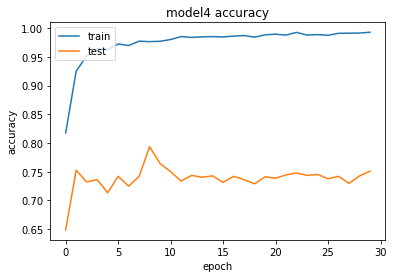

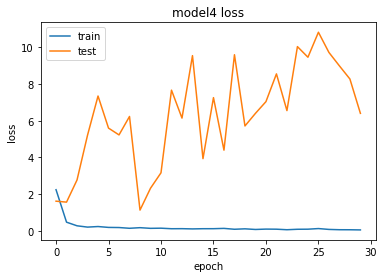

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
ground_truth = validation_generator.classes
label2index = validation_generator.class_indices
label2index

{'Glaucoma': 0, 'Normal': 1, 'Others': 2}

In [35]:
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_features,steps=1, verbose=0)
prob = model.predict(test_features)
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nTest))

No of errors = 1/1527


<ipython-input-35-625e10052f78>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  errors = np.where(predictions != ground_truth)[0]


In [36]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_features)

#print('\n', sklearn.metrics.classification_report(np.where( validation_labels > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')
print('\n', sklearn.metrics.classification_report(np.where( test_labels > 0)[1], np.argmax(y_pred, axis=1)))


               precision    recall  f1-score   support

           0       0.96      0.21      0.34       509
           1       0.58      0.99      0.74       509
           2       0.92      1.00      0.96       509

    accuracy                           0.73      1527
   macro avg       0.82      0.73      0.68      1527
weighted avg       0.82      0.73      0.68      1527



In [4]:
pred = model.predict_generator(test_features)

NameError: name 'test_features' is not defined

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_class_indices))

NameError: name 'y_test' is not defined

In [39]:
ground_truth = test_generator.classes
label2index = test_generator.class_indices
label2index

{'Glaucoma': 0, 'Normal': 1, 'Others': 2}

In [40]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                         title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")
  
  print(cm)
  
  thresh = cm.max() / 2.
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
            horizontalalignment ="center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
predictions

array([[3.8025890e-22, 1.0000000e+00, 1.1933114e-13],
       [5.6482678e-17, 1.0000000e+00, 1.5788072e-21],
       [7.4538471e-33, 5.8882951e-26, 1.0000000e+00],
       ...,
       [3.8252234e-05, 9.9996173e-01, 1.3437855e-14],
       [1.8560337e-24, 1.0000000e+00, 0.0000000e+00],
       [3.4961869e-26, 1.0000000e+00, 1.6968119e-38]], dtype=float32)

In [42]:
x_labels = test_labels.argmax(axis=1)
print(x_labels)

[1 0 2 ... 0 0 1]


In [43]:
y_labels = predictions.argmax(axis=1)

cm = confusion_matrix(x_labels, y_labels)


In [44]:
cm_plot_labels = ['Glaucoma','Normal','Others']

Confusion Matrix without normalization
[[106 359  44]
 [  4 505   0]
 [  0   0 509]]


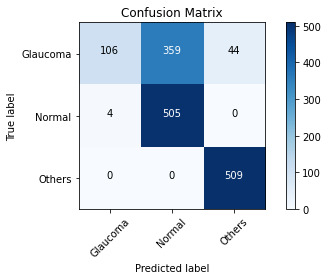

In [45]:
import itertools

plot_confusion_matrix(cm, cm_plot_labels, title ='Confusion Matrix')


In [192]:
from keras.models import load_model
#model = load_model('G://Deep Model//Densenet//model5-09-0.7936.hdf5')
model = tf.keras.models.load_model('G://Deep Model//Densenet//model5-09-0.7936.h5')

# summarize model.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              50177000  
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 3003      
Total params: 50,180,003
Trainable params: 50,180,003
Non-trainable params: 0
_________________________________________________________________


In [219]:
import cv2
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from keras import models
from keras import layers
from keras import optimizers

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    print(new_array.shape)
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)


test_image = prepare('C://Users//Admin//Desktop//b41da080-76a6-11e9-8d17-66e2dab18612.jpg')

img = cv2.imread('C://Users//Admin//Desktop//blurredshaderflipimage419prime.jpg')
img = cv2.resize(img,(224,224))
img = tf.reshape(img,[224,224,3])
#test_image = np.reshape(test_image,(1, 7 * 7 * 1024))
#classes = model.predict_classes(img)
#input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(test_image)


(224, 224, 3)


ValueError: in user code:

    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 50176 but received input with shape (None, 224, 224, 3)


In [194]:
from keras.preprocessing import image

img1 = image.load_img('C://Users//Admin//Desktop//blurredshaderflipimage419prime.jpg', target_size=(224, 224,3))
img1 = image.img_to_array(img1)

In [195]:
x = image.img_to_array(img1)
x = 
x = img1.flatten()

SyntaxError: invalid syntax (<ipython-input-195-f3d3c9202563>, line 2)

In [196]:
x.shape

(150528,)

In [197]:
predicted = model.predict(x)

ValueError: in user code:

    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 50176 but received input with shape (32, 1)


In [1]:
import tensorflow as tf
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.models import Sequential,Model,load_model
from tensorflow.python.client import device_lib
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras.applications import ResNet152

In [2]:
model = ResNet152(weights='imagenet',
                    include_top=False,
                    input_shape=(224, 224, 3))

In [3]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________